# EXPLORATORY DATA ANALYSIS

Importing libraries for data processing

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the csv file

In [24]:
train=pd.read_csv('Malignant_comments_train.csv')

In [25]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [26]:
test=pd.read_csv('test.csv')

In [27]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [28]:
train.shape

(159571, 8)

In [29]:
test.shape

(153164, 2)

In [30]:
#Removing irrelevant columns from train and test
train.drop(["id"],axis=1 ,inplace=True)

In [31]:
test.drop(["id"],axis=1 ,inplace=True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


#There are no null values.

In [33]:
train.nunique()

comment_text        159570
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [34]:
train['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [35]:
test['comment_text'][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [36]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
malignant,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [37]:
train.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [38]:
#creating a subset with total counts of each category
data_count=train.iloc[: ,1: ].sum()

In [39]:
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

#highly malignant,loathe and threat comments comments are very few when compared to others.
#From 159571 comments only 35,098 comments belong to malignant and others are normal category

# BAR PLOT

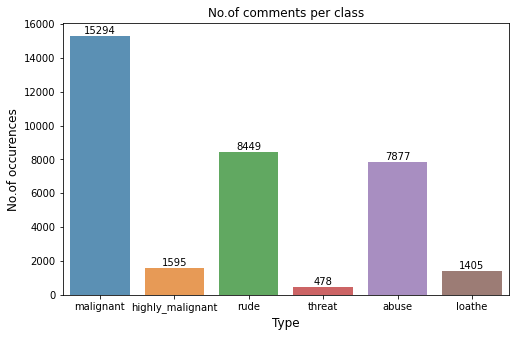

In [55]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data_count.index, data_count.values, alpha=0.8)  #alpha=0.8 to make bars more translucent

plt.title("No.of comments per class")
plt.ylabel("No.of occurences",fontsize=12)
plt.xlabel("Type",fontsize=12)

#adding text labels for each bar
rects=ax.patches
labels=data_count.values
for rect,label in zip(rects,labels):
    height=rect.get_height()
    ax.text(rect.get_x() +rect.get_width()/2,height +5,label ,ha='center' ,va='bottom')
    
plt.show()

In [57]:
import re                                       #library for regular expression operations
import string                                   #for string operations
from nltk.corpus import stopwords               #module for stopwords
from nltk.stem import PorterStemmer             #module for stemming
from nltk.tokenize import regexp_tokenize       #module for tokenizing string
from nltk.tokenize import TreebankWordTokenizer

In [58]:
#converting comments in train to lower case
train['comment_text']=train['comment_text'].str.lower()
train.head(5)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_type
0,explanation why the edits made under my userna...,0,0,0,0,0,0,0
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,0
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,0
3,more i can t make any real suggestions on imp...,0,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0


In [59]:
#converting comments in test to lower case
test['comment_text']=test['comment_text'].str.lower()
test.head(5)

,comment_text
0,yo bitch ja rule is more succesful then you ll...
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the inf...
4,i don t anonymously edit articles at all


#Removing punctuations,urls ,numbers etc from train data

In [60]:
#replace email address with 'email'
train['comment_text']=train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#replace URLs with 'web address'
train['comment_text']=train['comment_text'].str.replace(r'^httpp\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace moneysymbols with 'moneysymb'
train['comment_text']=train['comment_text'].str.replace(r'$','dollers')

#replace phone numbers with 'phonenumber
train['comment_text']=train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with number
train['comment_text']=train['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [61]:
#remove punctuation
train['comment_text']=train['comment_text'].str.replace(r'[^\w\d\s]',' ')

#remove whitespace in between terms with single space
train['comment_text']=train['comment_text'].str.replace(r'\s+',' ')

#remove leadin and training white space
train['comment_text']=train['comment_text'].str.replace(r'^\s+|\s+?$',' ')

#Removing punctuations,urls ,numbers etc from test data

In [62]:
#replace email address with 'email'
test['comment_text']=test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#replace URLs with 'web address'
test['comment_text']=test['comment_text'].str.replace(r'^httpp\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace moneysymbols with 'moneysymb'
test['comment_text']=test['comment_text'].str.replace(r'$','dollers')

#replace phone numbers with 'phonenumber
test['comment_text']=test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with number
test['comment_text']=test['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [63]:
#remove punctuation
test['comment_text']=test['comment_text'].str.replace(r'[^\w\d\s]',' ')

#remove whitespace in between terms with single space
test['comment_text']=test['comment_text'].str.replace(r'\s+',' ')

#remove leadin and training white space
test['comment_text']=test['comment_text'].str.replace(r'^\s+|\s+?$',' ')

In [64]:
train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_type
0,explanation why the edits made under my userna...,0,0,0,0,0,0,0
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,0
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,0
3,more i can t make any real suggestions on imp...,0,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0
5,congratulations from me as well use the tools...,0,0,0,0,0,0,0
6,cocksucker before you piss around on my work,1,1,1,0,1,0,1
7,your vandalism to the matt shirvington article...,0,0,0,0,0,0,0
8,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [65]:
train['comment_type']=train[["malignant","highly_malignant","rude","threat","abuse","loathe"]].max(axis=1)

In [66]:
train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_type
0,explanation why the edits made under my userna...,0,0,0,0,0,0,0
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,0
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,0
3,more i can t make any real suggestions on imp...,0,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0
5,congratulations from me as well use the tools...,0,0,0,0,0,0,0
6,cocksucker before you piss around on my work,1,1,1,0,1,0,1
7,your vandalism to the matt shirvington article...,0,0,0,0,0,0,0
8,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [51]:
test.head(10)

,comment_text
0,yo bitch ja rule is more succesful then you ll...
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the inf...
4,i don t anonymously edit articles at all
5,thank you for understanding i think very highl...
6,please do not add nonsense to wikipedia such e...
7,dear god this site is horrible
8,only a fool can believe in such numbers the c...
9,double redirects when fixing double redirects...


In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
### train Dataset Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(train)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', train['comment_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

Streaming output truncated to the last 5000 lines.
110607
110608
110609
110610
110611
110612
110613
110614
110615
110616
110617
110618
110619
110620
110621
110622
110623
110624
110625
110626
110627
110628
110629
110630
110631
110632
110633
110634
110635
110636
110637
110638
110639
110640
110641
110642
110643
110644
110645
110646
110647
110648
110649
110650
110651
110652
110653
110654
110655
110656
110657
110658
110659
110660
110661
110662
110663
110664
110665
110666
110667
110668
110669
110670
110671
110672
110673
110674
110675
110676
110677
110678
110679
110680
110681
110682
110683
110684
110685
110686
110687
110688
110689
110690
110691
110692
110693
110694
110695
110696
110697
110698
110699
110700
110701
110702
110703
110704
110705
110706
110707
110708
110709
110710
110711
110712
110713
110714
110715
110716
110717
110718
110719
110720
110721
110722
110723
110724
110725
110726
110727
110728
110729
110730
110731
110732
110733
110734
110735
110736
110737
110738
110739
110740
110741
1107

RecursionError: ignored

In [68]:
### test Dataset Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(test)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', test['comment_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)

Streaming output truncated to the last 5000 lines.
148164
148165
148166
148167
148168
148169
148170
148171
148172
148173
148174
148175
148176
148177
148178
148179
148180
148181
148182
148183
148184
148185
148186
148187
148188
148189
148190
148191
148192
148193
148194
148195
148196
148197
148198
148199
148200
148201
148202
148203
148204
148205
148206
148207
148208
148209
148210
148211
148212
148213
148214
148215
148216
148217
148218
148219
148220
148221
148222
148223
148224
148225
148226
148227
148228
148229
148230
148231
148232
148233
148234
148235
148236
148237
148238
148239
148240
148241
148242
148243
148244
148245
148246
148247
148248
148249
148250
148251
148252
148253
148254
148255
148256
148257
148258
148259
148260
148261
148262
148263
148264
148265
148266
148267
148268
148269
148270
148271
148272
148273
148274
148275
148276
148277
148278
148279
148280
148281
148282
148283
148284
148285
148286
148287
148288
148289
148290
148291
148292
148293
148294
148295
148296
148297
148298
1482

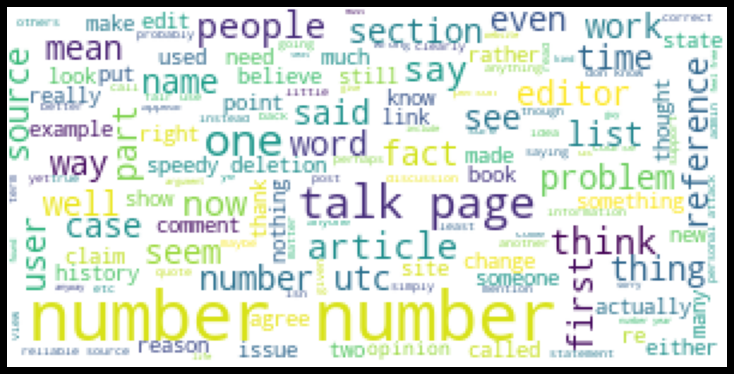

In [71]:
#understanding the data and displaying the loud words in train data
from wordcloud import WordCloud

words=''.join ([text for text in train['comment_text']])
word_cloud=WordCloud(width=300,height=150,background_color='white',max_words=200).generate(words)

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

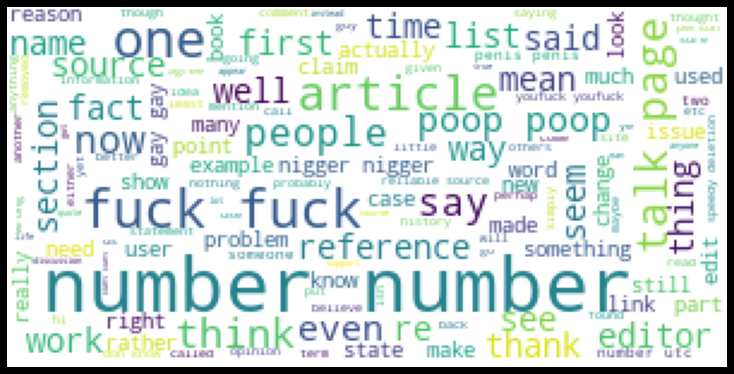

In [72]:
#understanding the data and displaying the loud words in test data
from wordcloud import WordCloud

words=''.join ([text for text in test['comment_text']])
word_cloud=WordCloud(width=300,height=150,background_color='white',max_words=200).generate(words)

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [73]:
train.drop(["malignant"],axis=1,inplace=True)
train.drop(["highly_malignant"],axis=1,inplace=True)
train.drop(["rude"],axis=1,inplace=True)
train.drop(["threat"],axis=1,inplace=True)
train.drop(["abuse"],axis=1,inplace=True)
train.drop(["loathe"],axis=1,inplace=True)
train.head()

,comment_text,comment_type
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m se...,0
2,hey man i m really not trying to edit war it s...,0
3,more i can t make any real suggestions on imp...,0
4,you sir are my hero any chance you remember wh...,0


In [74]:
data=pd.concat([train,test])

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(data['comment_text'])

x=features
y=data['comment_type']


In [76]:
print(x.shape)
print(y.shape)

(312735, 336666)
(312735,)


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=46)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(243933, 336666)
(68802, 336666)
(243933,)
(68802,)


In [79]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

ValueError: ignored